# keras Softmax for CIFAR10 test
a softmax network for CIFAR10 classfier test, correspoding to CS231n assignment1 softmax part.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from cifar10_demo.data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Training data shape: (50000, 32, 32, 3)
Training label shape (50000, 1)
Test data shape (10000, 32, 32, 3)
Test label shape (10000, 1)


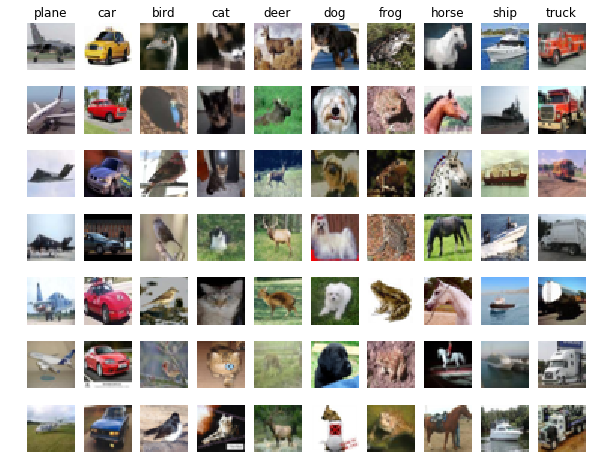

In [10]:
cifar10_data = CIFAR10Data()
plot_cifar10(cifar10_data, 7)

In [11]:
# get stretch data
x_train, y_train, x_test, y_test = cifar10_data.get_stretch_data(subtract_mean=True)

# Subsample data for more efficient code execution
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


# Softmax test
here we use softmax classifier for cifar10

In [12]:
# training 

softmax_model = Sequential()
softmax_model.add(Dense(10, 
                        input_shape=(3072,),
                        kernel_regularizer=keras.regularizers.l2(2.5e4),
                        kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
                        ))
softmax_model.add(Activation('softmax'))

opt = koptimizer=keras.optimizers.SGD(lr=1e-7)
softmax_model.compile(optimizer=opt,
                      loss=keras.losses.categorical_crossentropy,
                      metrics=['accuracy'],
                      )
softmax_model.summary()
history = softmax_model.fit(x_train, y_train,
                            epochs=6, batch_size=200,
                            validation_split=0.02, shuffle=True,
                            )
# Test loss is euqal log(C)
# loss, acc = softmax_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/6


  200/49000 [..............................] - ETA: 22s - loss: 765.2302 - acc: 0.1400

 2800/49000 [>.............................] - ETA: 2s - loss: 717.5101 - acc: 0.1236 

 5400/49000 [==>...........................] - ETA: 1s - loss: 673.6821 - acc: 0.1250

 8000/49000 [===>..........................] - ETA: 1s - loss: 633.4454 - acc: 0.1295

10600/49000 [=====>........................] - ETA: 1s - loss: 596.4659 - acc: 0.1314

13200/49000 [=======>......................] - ETA: 0s - loss: 562.4449 - acc: 0.1356

15800/49000 [========>.....................] - ETA: 0s - loss: 531.1125 - acc: 0.1373

18200/49000 [==========>...................] - ETA: 0s - loss: 504.3659 - acc: 0.1408

20600/49000 [===========>..................] - ETA: 0s - loss: 479.5254 - acc: 0.1441

23000/49000 [=============>................] - ETA: 0s - loss: 456.4440 - acc: 0.1468

25600/49000 [==============>...............] - ETA: 0s - loss: 433.2560 - acc: 0.1480

28400/49000 [================>.............] - ETA: 0s - loss: 410.2020 - acc: 0.1514

31200/49000 [==================>...........] - ETA: 0s - loss: 388.9614 - acc: 0.1548

33800/49000 [===================>..........] - ETA: 0s - loss: 370.7159 - acc: 0.1580

36200/49000 [=====================>........] - ETA: 0s - loss: 355.0240 - acc: 0.1611

38600/49000 [======================>.......] - ETA: 0s - loss: 340.3523 - acc: 0.1635

41000/49000 [========================>.....] - ETA: 0s - loss: 326.6197 - acc: 0.1660

43400/49000 [=========================>....] - ETA: 0s - loss: 313.7553 - acc: 0.1692

45800/49000 [===========================>..] - ETA: 0s - loss: 301.6910 - acc: 0.1712

47400/49000 [============================>.] - ETA: 0s - loss: 294.0646 - acc: 0.1722

49000/49000 [==============================] - 1s 24us/step - loss: 286.7493 - acc: 0.1740 - val_loss: 66.9983 - val_acc: 0.2480


Epoch 2/6
  200/49000 [..............................] - ETA: 2s - loss: 66.9611 - acc: 0.2400

 2600/49000 [>.............................] - ETA: 1s - loss: 63.2360 - acc: 0.2304

 5000/49000 [==>...........................] - ETA: 1s - loss: 59.7613 - acc: 0.2394

 7800/49000 [===>..........................] - ETA: 0s - loss: 56.0514 - acc: 0.2372

10200/49000 [=====>........................] - ETA: 0s - loss: 53.1289 - acc: 0.2383

12800/49000 [======>.......................] - ETA: 0s - loss: 50.2040 - acc: 0.2411

15600/49000 [========>.....................] - ETA: 0s - loss: 47.3092 - acc: 0.2442

18400/49000 [==========>...................] - ETA: 0s - loss: 44.6566 - acc: 0.2469

20800/49000 [===========>..................] - ETA: 0s - loss: 42.5571 - acc: 0.2512

23200/49000 [=============>................] - ETA: 0s - loss: 40.6073 - acc: 0.2530

25400/49000 [==============>...............] - ETA: 0s - loss: 38.9389 - acc: 0.2549

27600/49000 [===============>..............] - ETA: 0s - loss: 37.3755 - acc: 0.2576

30400/49000 [=================>............] - ETA: 0s - loss: 35.5275 - acc: 0.2587

33000/49000 [===================>..........] - ETA: 0s - loss: 33.9405 - acc: 0.2598

35800/49000 [====================>.........] - ETA: 0s - loss: 32.3565 - acc: 0.2624

38400/49000 [======================>.......] - ETA: 0s - loss: 30.9939 - acc: 0.2629

41200/49000 [========================>.....] - ETA: 0s - loss: 29.6293 - acc: 0.2669

43800/49000 [=========================>....] - ETA: 0s - loss: 28.4517 - acc: 0.2695

46600/49000 [===========================>..] - ETA: 0s - loss: 27.2727 - acc: 0.2714

49000/49000 [==============================] - 1s 21us/step - loss: 26.3282 - acc: 0.2736 - val_loss: 7.6242 - val_acc: 0.3320


Epoch 3/6
  200/49000 [..............................] - ETA: 1s - loss: 7.5874 - acc: 0.2900

 3000/49000 [>.............................] - ETA: 0s - loss: 7.2356 - acc: 0.3160

 5800/49000 [==>...........................] - ETA: 0s - loss: 6.9023 - acc: 0.3121

 8600/49000 [====>.........................] - ETA: 0s - loss: 6.6016 - acc: 0.3131

11200/49000 [=====>........................] - ETA: 0s - loss: 6.3420 - acc: 0.3120

14000/49000 [=======>......................] - ETA: 0s - loss: 6.0785 - acc: 0.3162

16800/49000 [=========>....................] - ETA: 0s - loss: 5.8409 - acc: 0.3167

19400/49000 [==========>...................] - ETA: 0s - loss: 5.6367 - acc: 0.3172

22200/49000 [============>.................] - ETA: 0s - loss: 5.4338 - acc: 0.3184

24800/49000 [==============>...............] - ETA: 0s - loss: 5.2629 - acc: 0.3186

27600/49000 [===============>..............] - ETA: 0s - loss: 5.0926 - acc: 0.3184

30400/49000 [=================>............] - ETA: 0s - loss: 4.9369 - acc: 0.3182

33200/49000 [===================>..........] - ETA: 0s - loss: 4.7925 - acc: 0.3183

35800/49000 [====================>.........] - ETA: 0s - loss: 4.6677 - acc: 0.3176

38600/49000 [======================>.......] - ETA: 0s - loss: 4.5433 - acc: 0.3182

41200/49000 [========================>.....] - ETA: 0s - loss: 4.4348 - acc: 0.3194

44000/49000 [=========================>....] - ETA: 0s - loss: 4.3275 - acc: 0.3195

46400/49000 [===========================>..] - ETA: 0s - loss: 4.2408 - acc: 0.3200

49000/49000 [==============================] - 1s 19us/step - loss: 4.1540 - acc: 0.3205 - val_loss: 2.5616 - val_acc: 0.3420


Epoch 4/6
  200/49000 [..............................] - ETA: 1s - loss: 2.5633 - acc: 0.3200

 2800/49000 [>.............................] - ETA: 0s - loss: 2.5313 - acc: 0.3207

 5400/49000 [==>...........................] - ETA: 0s - loss: 2.5007 - acc: 0.3226

 8000/49000 [===>..........................] - ETA: 0s - loss: 2.4712 - acc: 0.3290

10800/49000 [=====>........................] - ETA: 0s - loss: 2.4507 - acc: 0.3276

13600/49000 [=======>......................] - ETA: 0s - loss: 2.4307 - acc: 0.3265

16200/49000 [========>.....................] - ETA: 0s - loss: 2.4123 - acc: 0.3274

19000/49000 [==========>...................] - ETA: 0s - loss: 2.3945 - acc: 0.3262

21600/49000 [============>.................] - ETA: 0s - loss: 2.3764 - acc: 0.3274

24400/49000 [=============>................] - ETA: 0s - loss: 2.3596 - acc: 0.3272

27000/49000 [===============>..............] - ETA: 0s - loss: 2.3464 - acc: 0.3265

29800/49000 [=================>............] - ETA: 0s - loss: 2.3313 - acc: 0.3269

32600/49000 [==================>...........] - ETA: 0s - loss: 2.3195 - acc: 0.3264

34800/49000 [====================>.........] - ETA: 0s - loss: 2.3104 - acc: 0.3258

37400/49000 [=====================>........] - ETA: 0s - loss: 2.3012 - acc: 0.3255

39800/49000 [=======================>......] - ETA: 0s - loss: 2.2917 - acc: 0.3262

42200/49000 [========================>.....] - ETA: 0s - loss: 2.2844 - acc: 0.3257

44800/49000 [==========================>...] - ETA: 0s - loss: 2.2760 - acc: 0.3259

46800/49000 [===========================>..] - ETA: 0s - loss: 2.2688 - acc: 0.3262

49000/49000 [==============================] - 1s 21us/step - loss: 2.2622 - acc: 0.3270 - val_loss: 2.1300 - val_acc: 0.3490


Epoch 5/6
  200/49000 [..............................] - ETA: 1s - loss: 2.1031 - acc: 0.3700

 2200/49000 [>.............................] - ETA: 1s - loss: 2.1234 - acc: 0.3255

 4600/49000 [=>............................] - ETA: 1s - loss: 2.1250 - acc: 0.3235

 7400/49000 [===>..........................] - ETA: 0s - loss: 2.1288 - acc: 0.3214

10200/49000 [=====>........................] - ETA: 0s - loss: 2.1243 - acc: 0.3235

12800/49000 [======>.......................] - ETA: 0s - loss: 2.1209 - acc: 0.3259

15400/49000 [========>.....................] - ETA: 0s - loss: 2.1206 - acc: 0.3270

18200/49000 [==========>...................] - ETA: 0s - loss: 2.1171 - acc: 0.3286

21000/49000 [===========>..................] - ETA: 0s - loss: 2.1133 - acc: 0.3277

23600/49000 [=============>................] - ETA: 0s - loss: 2.1106 - acc: 0.3291

26200/49000 [===============>..............] - ETA: 0s - loss: 2.1103 - acc: 0.3283

29000/49000 [================>.............] - ETA: 0s - loss: 2.1091 - acc: 0.3274

31800/49000 [==================>...........] - ETA: 0s - loss: 2.1076 - acc: 0.3281

34600/49000 [====================>.........] - ETA: 0s - loss: 2.1064 - acc: 0.3288

37400/49000 [=====================>........] - ETA: 0s - loss: 2.1046 - acc: 0.3286

40200/49000 [=======================>......] - ETA: 0s - loss: 2.1034 - acc: 0.3285

42800/49000 [=========================>....] - ETA: 0s - loss: 2.1030 - acc: 0.3282

45600/49000 [==========================>...] - ETA: 0s - loss: 2.1018 - acc: 0.3285

48200/49000 [============================>.] - ETA: 0s - loss: 2.1009 - acc: 0.3284

49000/49000 [==============================] - 1s 20us/step - loss: 2.1007 - acc: 0.3286 - val_loss: 2.0932 - val_acc: 0.3490


Epoch 6/6
  200/49000 [..............................] - ETA: 1s - loss: 2.0392 - acc: 0.3750

 2800/49000 [>.............................] - ETA: 0s - loss: 2.0861 - acc: 0.3261

 5400/49000 [==>...........................] - ETA: 0s - loss: 2.0881 - acc: 0.3317

 8000/49000 [===>..........................] - ETA: 0s - loss: 2.0823 - acc: 0.3360

10600/49000 [=====>........................] - ETA: 0s - loss: 2.0821 - acc: 0.3336

13400/49000 [=======>......................] - ETA: 0s - loss: 2.0822 - acc: 0.3346

16200/49000 [========>.....................] - ETA: 0s - loss: 2.0814 - acc: 0.3340

18800/49000 [==========>...................] - ETA: 0s - loss: 2.0824 - acc: 0.3342

21600/49000 [============>.................] - ETA: 0s - loss: 2.0809 - acc: 0.3342

24200/49000 [=============>................] - ETA: 0s - loss: 2.0832 - acc: 0.3317

26800/49000 [===============>..............] - ETA: 0s - loss: 2.0846 - acc: 0.3307

29400/49000 [=================>............] - ETA: 0s - loss: 2.0851 - acc: 0.3305

32200/49000 [==================>...........] - ETA: 0s - loss: 2.0862 - acc: 0.3294

34800/49000 [====================>.........] - ETA: 0s - loss: 2.0863 - acc: 0.3299

37600/49000 [======================>.......] - ETA: 0s - loss: 2.0873 - acc: 0.3294

40200/49000 [=======================>......] - ETA: 0s - loss: 2.0875 - acc: 0.3296

43000/49000 [=========================>....] - ETA: 0s - loss: 2.0874 - acc: 0.3295

45600/49000 [==========================>...] - ETA: 0s - loss: 2.0866 - acc: 0.3293

48200/49000 [============================>.] - ETA: 0s - loss: 2.0870 - acc: 0.3288

49000/49000 [==============================] - 1s 20us/step - loss: 2.0868 - acc: 0.3286 - val_loss: 2.0909 - val_acc: 0.3510


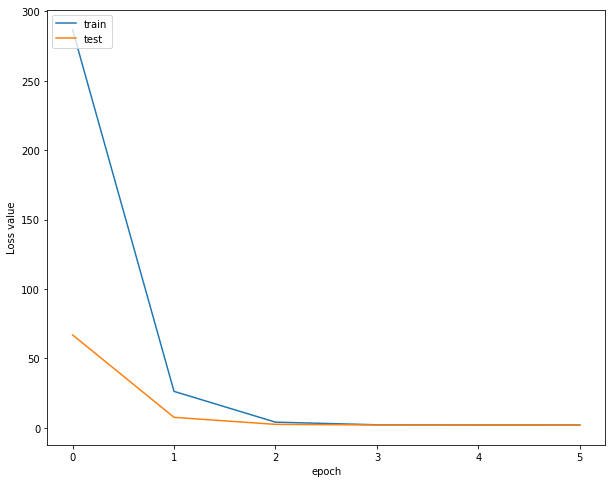

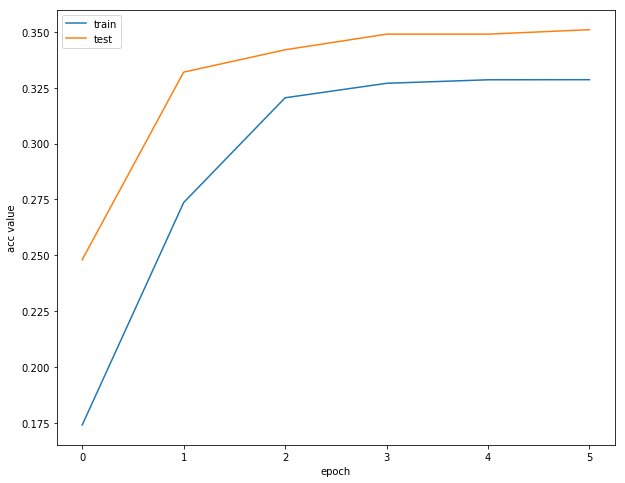

   32/10000 [..............................] - ETA: 0s

 1792/10000 [====>.........................] - ETA: 0s

 2944/10000 [=======>......................] - ETA: 0s

 4160/10000 [===========>..................] - ETA: 0s

 6240/10000 [=================>............] - ETA: 0s

 8256/10000 [=======================>......] - ETA: 0s

 9408/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 0s 32us/step


evaluate loss:2.082768 acc:0.334100


In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evalute SVM model
loss, acc = softmax_model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))